# Orchid Classification using CNN (MobileNetV2) + K-Fold + Confusion Matrix

**AUTHOR** : Raihan Allaam - https://alamehan.github.io/links/

---

<img src="https://raw.githubusercontent.com/alamehan/skripsi-cnn-anggrek/master/assets/genus.jpg" width=500><br>

**DESCRIPTION** :

Orchid is one of the ornamental plants that is widely cultivated. Each genus of orchids has different cultivation methods, so orchid cultivators who are just starting out need to know the genus of orchids they will cultivate first. However, not a few beginners trying to cultivate orchids without sufficient knowledge and experience, so the cultivated orchids do not grow and flower optimally. In this study, a system was built that could classify the image of orchid genera, namely the genus Cattleya, Dendrobium, Oncidium, Phalaenopsis, and Vanda. Image classification is carried out using the Convolutional Neural Network (CNN) method. Where the image of the orchid as input data will be carried out according to the genus classification process. All of these classification processes are carried out through a training and testing scheme, where the training stage produces a CNN model and updated weights, then the testing stage uses the model to be tested against new image data. K-Fold Cross Validation is used at the training stage, then to evaluate the CNN model after testing, the Confusion Matrix is used.

---

**DATASET USED** :

- 4000 train data without background + augmentation (800 image/genus)
- 2500 test data (500 image/genus)
- 185 test data from internet (25 cattleya and 40 other genus)

---

**SETUP & HYPERPARAMETER** :

- Image Input Shape: 128x128x3 (RGB)
- CNN Architecture: MobileNetV2
- K in K-Fold Cross Validation: 5
- Epoch: 10 & Batch Size: 64
- Optimizer: Adam
- Learning Rate: 0.0001

---
# 1. Install TensorFlow 2.2
---

In [ ]:
!pip install tensorflow==2.2

ERROR: Could not find a version that satisfies the requirement tensorflow==2.2 (from versions: 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.11.1, 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0, 2.13.1, 2.14.0rc0, 2.14.0rc1, 2.14.0, 2.14.1, 2.15.0rc0, 2.15.0rc1, 2.15.0, 2.15.0.post1, 2.15.1, 2.16.0rc0, 2.16.1)
ERROR: No matching distribution found for tensorflow==2.2


In [ ]:
import tensorflow as tf
from tensorflow import keras


In [ ]:
!pip list --version

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.9.5
aiosignal                        1.3.1
alabaster                        0.7.16
albumentations                   1.3.1
altair                           4.2.2
annotated-types                  0.6.0
anyio                            3.7.1
appdirs                          1.4.4
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array_record                     0.5.1
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.1.0
attrs                            23.2.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.14.0
backcall                         0.2.0
beautifulsoup4                   4.12.3


---
# 2. Data Preprocessing
---

## 2-1. Load Image Data as Array

In [ ]:
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import cv2
import random
import numpy as np

img_size_224p = 128 # ⚠️Can be Customized⚠️ If use 224 pixels, it will be Out of Memory (OOM)

path_train  = '/content/drive/My Drive/DSO_569/orchid_genus/train'
path_test   = '/content/drive/My Drive/DSO_569/orchid_genus/test'
categories  = ['cattleya', 'dendrobium', 'oncidium', 'phalaenopsis', 'vanda']

def create_data_img(folder_path):
    imageData = []
    for category in categories:
        path = os.path.join(folder_path, category)
        class_num = categories.index(category) # Take the Label as the Index
        for img in os.listdir(path):
            img_array   = cv2.imread(os.path.join(path, img))
            img_convert = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
            img_resize  = cv2.resize(img_convert, (img_size_224p, img_size_224p))
            imageData.append([img_resize, class_num])

    return imageData

dataTrain   = create_data_img(path_train)
dataTest    = create_data_img(path_test)

# Shuffle the Train Data (if don't shuffle, the Train Data will be sorted by Labels)
random.seed(10) # 10 as the Shuffle Index, so that when re-running the program, the results of the shuffle are the same
random.shuffle(dataTrain)

## 2-2. Get Features (X) & Labels (y)

In [ ]:
# X for Features & y for Labels
X_train, y_train, X_test, y_test = [], [], [], []

for features, label in dataTrain:
    X_train.append(features)
    y_train.append(label)

for features, label in dataTest:
    X_test.append(features)
    y_test.append(label)

# -1 in reshape, means to let Numpy define the appropriate data dimensions
X_train = np.array(X_train).reshape(-1, img_size_224p, img_size_224p, 3)
y_train = np.asarray(y_train)
X_test  = np.array(X_test).reshape(-1, img_size_224p, img_size_224p, 3)
y_test  = np.asarray(y_test)

print("X_train :", X_train.shape)
print("y_train :", y_train.shape)
print("X_test  :", X_test.shape)
print("y_test  :", y_test.shape)

X_train : (4000, 128, 128, 3)
y_train : (4000,)
X_test  : (2500, 128, 128, 3)
y_test  : (2500,)


## 2-3. Features (X) : Feature Scaling

In [1]:
print("Array of X_train :\n\n", X_train[0]) # Take the first data for example
print("\nArray of X_test  :\n\n", X_test[0])

def prep_pixels(train, test):
    # Convert from integers to floats
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    # Normalize (feature scaling) to range 0-1
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    # Return normalized images
    return train_norm, test_norm

X_train_norm, X_test_norm = prep_pixels(X_train, X_test)

print("\nArray of X_train_norm :\n\n", X_train_norm[0])
print("\nArray of X_test_norm  :\n\n", X_test_norm[0])

NameError: name 'X_train' is not defined

## 2-4. Labels (y) : One Hot Encoding

In [ ]:
from keras.utils import to_categorical

print("Array of y_train :", y_train)
print("Array of y_test  :", y_test)

# One Hot Encode target values
y_train_encode = to_categorical(y_train)
y_test_encode  = to_categorical(y_test)

print("\nArray of y_train_encode :\n\n", y_train_encode)
print("\nArray of y_test_encode :\n\n", y_test_encode)

Array of y_train : [3 2 4 ... 2 0 2]
Array of y_test  : [0 0 0 ... 4 4 4]

Array of y_train_encode :

 [[0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 ...
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]]

Array of y_test_encode :

 [[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]]


## 2-5. Plot the Dataset

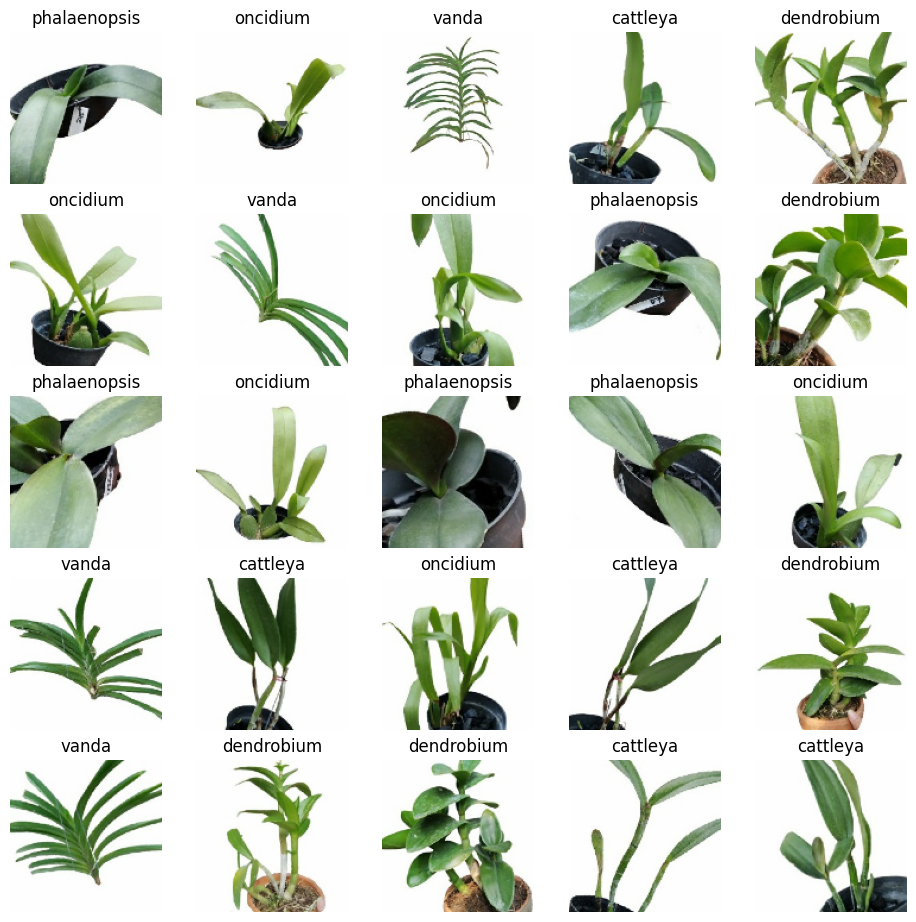

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

nrows = 5 # ⚠️Can be Customized⚠️
ncols = 5 # ⚠️Can be Customized⚠️
hspace = 0
wspace = 0
fig, ax = plt.subplots(nrows, ncols, figsize=(10, 10))
fig.subplots_adjust(hspace, wspace)

for i in range(nrows):
    for j in range(ncols):
        temp = i*ncols+j                # Index looping
        ax[i,j].imshow(X_train[temp])   # Show Features/images
        if y_train[temp] == 0:
            judul = "cattleya"
        elif y_train[temp] == 1:
            judul = "dendrobium"
        elif y_train[temp] == 2:
            judul = "oncidium"
        elif y_train[temp] == 3:
            judul = "phalaenopsis"
        elif y_train[temp] == 4:
            judul = "vanda"
        ax[i,j].set_title(judul)        # Show Labels
        ax[i,j].axis('off')             # Hide axis
plt.show()

## 2-6. Clean up Useless Data (RAM Cleaner)

In [ ]:
import gc     # Gabage Collector for cleaning deleted data from memory

del dataTrain
del dataTest
del X_train
del X_test
#del y_train  # Used later for Confusion Matrix
#del y_test   # Used later for Confusion Matrix

gc.collect()

64

## 2-7. The Final Data to be used on CNN

In [ ]:
print("X_train_norm     :", X_train_norm.shape)
print("y_train_encode   :", y_train_encode.shape)
print("X_test_norm      :", X_test_norm.shape)
print("y_test_encode    :", y_test_encode.shape)

X_train_norm     : (4000, 128, 128, 3)
y_train_encode   : (4000, 5)
X_test_norm      : (2500, 128, 128, 3)
y_test_encode    : (2500, 5)


---
# 3. Build CNN Architecture: MobileNetV2
---

## 3-1. Load a Pretrained MobileNetV2 Model

9406464/9406464 [==============================] - 0s 0us/step
Model: "mobilenetv2_1.00_128"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 64, 64, 32)           864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 64, 64, 32)           128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReL

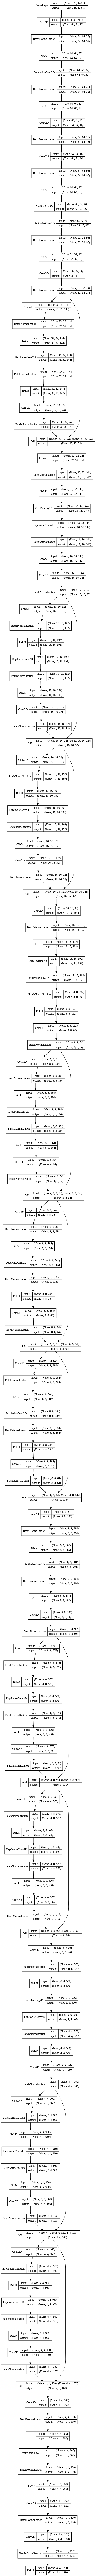

In [ ]:
from keras.applications import MobileNetV2
from keras.utils import plot_model

'''
Important Notes:

weights='imagenet'            The initial weights are filled directly with the "optimal" weight of the imagenet (pre-trained).
weights=None                  The initial weight are filled with a random value (in case: training from scratch).
include_top=False             Cut the head (top) of mobilenetv2 architecture, so that it can be modified according to the label used (in case: orchid).
conv_base.trainable=False     Can only be used if weights="imagenet", this means the weight in the feature extractor will be frozen,
                              it will not be updated during training, in other words, the extractor feature is only used.
'''

conv_base = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_size_224p, img_size_224p, 3))
conv_base.trainable = False
conv_base.summary()
plot_model(conv_base, to_file='model.png', show_shapes=True, show_layer_names=False, rankdir='TB', expand_nested=False, dpi=80)

## 3-2. Modified a MobileNetV2 Architecture

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_128 (Func  (None, 4, 4, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2264389 (8.64 MB)
Trainable params: 6405 (25.02 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


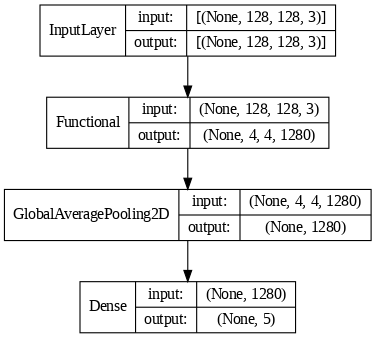

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D, BatchNormalization
from keras.optimizers import Adam

def define_model_mobilenetv2():
    model = Sequential()
    model.add(conv_base)                        # The Feature Extractor uses a Pre-trained Model
    model.add(GlobalAveragePooling2D())
    model.add(Dense(5, activation='softmax'))   # This means that in the Hidden Layer there are 5 Neurons (5 Orchid Labels)
                                                # activation='softmax'is used because of the Multi-Class Classification problem

    # Compile Model
    opt = Adam(lr=0.0001)                       # ⚠️Can be Customized⚠️
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy']) # categorical_crossentropy is used because
    return model                                                                        # of the Multi-Class Classification problem

# Clean the Previous Model (retraining needs)
if "model" in globals(): # Check if the Model Variables exist
  del model
  gc.collect()

model = define_model_mobilenetv2()
model.summary()
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=False, rankdir='TB', expand_nested=False, dpi=80)

---
# 4. OPTION 1: Training with K-Fold Cross Validation
---

## 4-1. Training with 5-Fold

In [ ]:
%%time

import pandas as pd
from sklearn.model_selection import KFold, StratifiedKFold, StratifiedShuffleSplit

def evaluate_model(dataX, dataY, n_folds=5):  # ⚠️Can be Customized⚠️ At this step, the Train Data will be split into Train and Validation Data
    epochs = 10                               # ⚠️Can be Customized⚠️
    batch_size = 64                           # ⚠️Can be Customized⚠️

    scores, histories = list(), list()
    kfold = KFold(n_folds, shuffle=True, random_state=1) # 1 as the Shuffle Index, so that when re-running the program, the results of the shuffle are the same

    i = 0
    # Enumerate splits
    for train_ix, val_ix in kfold.split(dataX):
        i = i+1
        model = define_model_mobilenetv2() # Define Model: Using MobileNetV2 which has been modified before
        trainX, trainY, valX, valY = dataX[train_ix], dataY[train_ix], dataX[val_ix], dataY[val_ix]  # Select rows for Train and Validation
        history = model.fit(trainX, trainY, epochs=epochs, batch_size=batch_size, validation_data=(valX, valY), verbose=1) # Fit Model
        loss, acc = model.evaluate(valX, valY, verbose=0) # Evaluate Model
        print('\nFold ' + str(i) + ' Accuracy = %.3f' % (acc * 100.0))
        print('Fold ' + str(i) + ' Loss = %.3f' % (loss) + '\n')
        scores.append(acc) # Append Scores
        histories.append(history) # Append Histories

        #----------------------------- Additional -----------------------------#

        model.save("model_fold_" + str(i) + ".h5")  # Save Model as h5
        model_csv = pd.DataFrame(history.history)   # Save Model Report to csv
        csv_file = "model_fold_" + str(i) + ".csv"
        with open(csv_file, mode="w") as f:
          model_csv.to_csv(f)

        # Clean the RAM for every Fold
        del trainX
        del trainY
        del valX
        del valY
        del model
        gc.collect()

    return scores, histories

scores, histories = evaluate_model(X_train_norm, y_train_encode)

Epoch 1/10
50/50 [==============================] - 61s 1s/step - loss: 0.5516 - accuracy: 0.8153 - val_loss: 0.1211 - val_accuracy: 0.9750
Epoch 2/10
50/50 [==============================] - 50s 999ms/step - loss: 0.0925 - accuracy: 0.9819 - val_loss: 0.0709 - val_accuracy: 0.9862
Epoch 3/10
50/50 [==============================] - 48s 966ms/step - loss: 0.0553 - accuracy: 0.9919 - val_loss: 0.0484 - val_accuracy: 0.9925
Epoch 4/10
50/50 [==============================] - 52s 1s/step - loss: 0.0385 - accuracy: 0.9959 - val_loss: 0.0362 - val_accuracy: 0.9950
Epoch 5/10
50/50 [==============================] - 49s 977ms/step - loss: 0.0293 - accuracy: 0.9969 - val_loss: 0.0302 - val_accuracy: 0.9962
Epoch 6/10
50/50 [==============================] - 52s 1s/step - loss: 0.0229 - accuracy: 0.9987 - val_loss: 0.0265 - val_accuracy: 0.9962
Epoch 7/10
50/50 [==============================] - 53s 1s/step - loss: 0.0185 - accuracy: 0.9997 - val_loss: 0.0212 - val_accuracy: 0.9962
Epoch 8/10


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/10
50/50 [==============================] - 67s 1s/step - loss: 0.5496 - accuracy: 0.8191 - val_loss: 0.1723 - val_accuracy: 0.9500
Epoch 2/10
50/50 [==============================] - 64s 1s/step - loss: 0.0979 - accuracy: 0.9819 - val_loss: 0.0972 - val_accuracy: 0.9725
Epoch 3/10
50/50 [==============================] - 56s 1s/step - loss: 0.0605 - accuracy: 0.9900 - val_loss: 0.0676 - val_accuracy: 0.9825
Epoch 4/10
50/50 [==============================] - 54s 1s/step - loss: 0.0406 - accuracy: 0.9944 - val_loss: 0.0537 - val_accuracy: 0.9900
Epoch 5/10
50/50 [==============================] - 64s 1s/step - loss: 0.0308 - accuracy: 0.9959 - val_loss: 0.0431 - val_accuracy: 0.9912
Epoch 6/10
50/50 [==============================] - 63s 1s/step - loss: 0.0241 - accuracy: 0.9978 - val_loss: 0.0380 - val_accuracy: 0.9912
Epoch 7/10
50/50 [==============================] - 56s 1s/step - loss: 0.0199 - accuracy: 0.9981 - val_loss: 0.0321 - val_accuracy: 0.9925
Epoch 8/10
50/50 [==

Epoch 1/10
50/50 [==============================] - 59s 1s/step - loss: 0.4789 - accuracy: 0.8434 - val_loss: 0.1420 - val_accuracy: 0.9663
Epoch 2/10
50/50 [==============================] - 53s 1s/step - loss: 0.0838 - accuracy: 0.9837 - val_loss: 0.0813 - val_accuracy: 0.9850
Epoch 3/10
50/50 [==============================] - 63s 1s/step - loss: 0.0506 - accuracy: 0.9922 - val_loss: 0.0573 - val_accuracy: 0.9900
Epoch 4/10
50/50 [==============================] - 63s 1s/step - loss: 0.0352 - accuracy: 0.9966 - val_loss: 0.0439 - val_accuracy: 0.9950
Epoch 5/10
50/50 [==============================] - 65s 1s/step - loss: 0.0259 - accuracy: 0.9978 - val_loss: 0.0362 - val_accuracy: 0.9962
Epoch 6/10
50/50 [==============================] - 53s 1s/step - loss: 0.0210 - accuracy: 0.9981 - val_loss: 0.0316 - val_accuracy: 0.9937
Epoch 7/10
50/50 [==============================] - 55s 1s/step - loss: 0.0168 - accuracy: 0.9991 - val_loss: 0.0261 - val_accuracy: 0.9975
Epoch 8/10
50/50 [==

Epoch 1/10
50/50 [==============================] - 65s 1s/step - loss: 0.5793 - accuracy: 0.7891 - val_loss: 0.1531 - val_accuracy: 0.9688
Epoch 2/10
50/50 [==============================] - 52s 1s/step - loss: 0.1021 - accuracy: 0.9772 - val_loss: 0.0732 - val_accuracy: 0.9887
Epoch 3/10
50/50 [==============================] - 51s 1s/step - loss: 0.0591 - accuracy: 0.9928 - val_loss: 0.0513 - val_accuracy: 0.9950
Epoch 4/10
50/50 [==============================] - 51s 1s/step - loss: 0.0415 - accuracy: 0.9966 - val_loss: 0.0394 - val_accuracy: 0.9962
Epoch 5/10
50/50 [==============================] - 49s 991ms/step - loss: 0.0326 - accuracy: 0.9975 - val_loss: 0.0324 - val_accuracy: 0.9962
Epoch 6/10
50/50 [==============================] - 47s 940ms/step - loss: 0.0245 - accuracy: 0.9984 - val_loss: 0.0257 - val_accuracy: 0.9962
Epoch 7/10
50/50 [==============================] - 47s 935ms/step - loss: 0.0196 - accuracy: 0.9994 - val_loss: 0.0223 - val_accuracy: 0.9975
Epoch 8/10


Epoch 1/10
50/50 [==============================] - 55s 1s/step - loss: 0.6616 - accuracy: 0.7709 - val_loss: 0.1514 - val_accuracy: 0.9638
Epoch 2/10
50/50 [==============================] - 47s 955ms/step - loss: 0.1161 - accuracy: 0.9803 - val_loss: 0.0734 - val_accuracy: 0.9900
Epoch 3/10
50/50 [==============================] - 47s 955ms/step - loss: 0.0689 - accuracy: 0.9897 - val_loss: 0.0534 - val_accuracy: 0.9925
Epoch 4/10
50/50 [==============================] - 46s 915ms/step - loss: 0.0483 - accuracy: 0.9953 - val_loss: 0.0387 - val_accuracy: 0.9962
Epoch 5/10
50/50 [==============================] - 57s 1s/step - loss: 0.0355 - accuracy: 0.9984 - val_loss: 0.0319 - val_accuracy: 0.9962
Epoch 6/10
50/50 [==============================] - 47s 943ms/step - loss: 0.0287 - accuracy: 0.9987 - val_loss: 0.0282 - val_accuracy: 0.9962
Epoch 7/10
50/50 [==============================] - 46s 918ms/step - loss: 0.0228 - accuracy: 0.9994 - val_loss: 0.0247 - val_accuracy: 0.9962
Epoch

## 4-2. Plot the Graphs of Training & Validation Results (Combine)

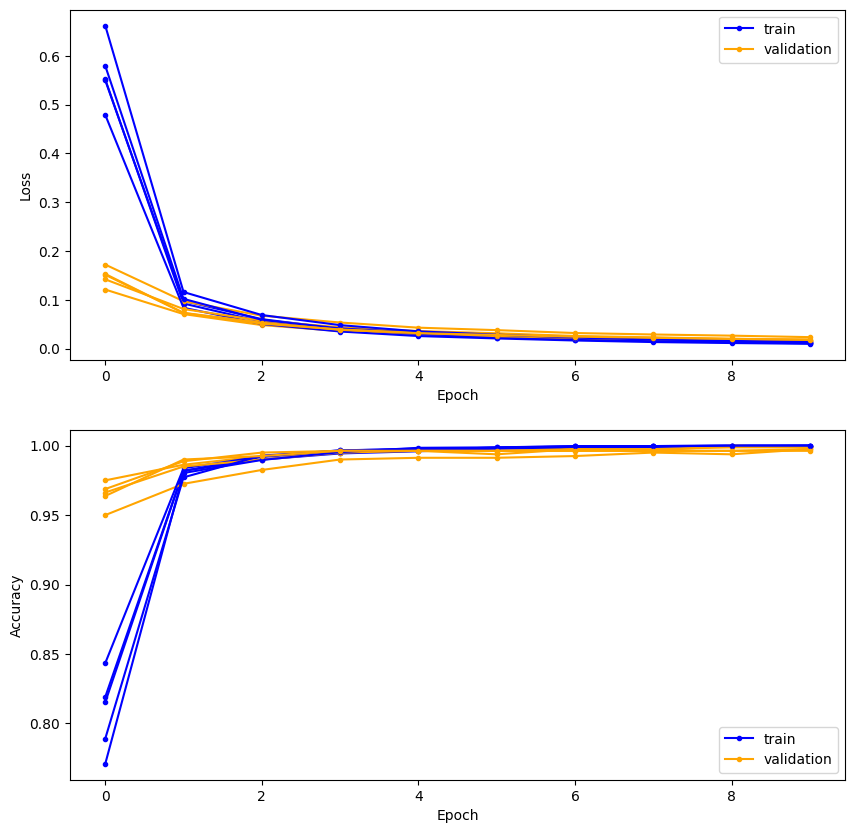

In [ ]:
import warnings
warnings.filterwarnings('ignore')

def summarize_diagnostics_combine(histories):
    plt.figure(figsize=(10,10))

    for i in range(len(histories)):
        # Loss Plot
        plt.subplot(211) # 2 rows, 1 column, 1st index
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.plot(histories[i].history['loss'], color='blue', marker='.', label='train')
        plt.plot(histories[i].history['val_loss'], color='orange', marker='.', label='test')
        plt.legend(['train', 'validation'], loc='upper right')

        # Accuracy Plot
        plt.subplot(212) # 2 rows, 1 column, 2nd index
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.plot(histories[i].history['accuracy'], color='blue', marker='.', label='train')
        plt.plot(histories[i].history['val_accuracy'], color='orange', marker='.', label='test')
        plt.legend(['train', 'validation'], loc='lower right')
    plt.show()

summarize_diagnostics_combine(histories)

## 4-2. Plot the Graphs of Training & Validation Results (Single)

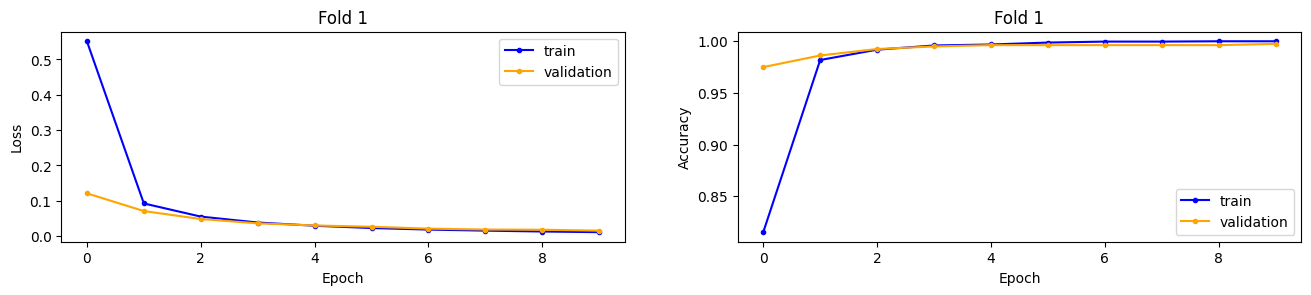

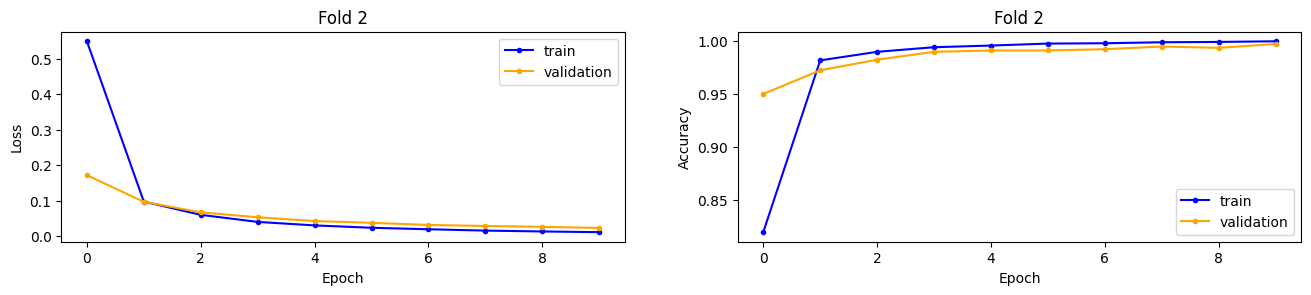

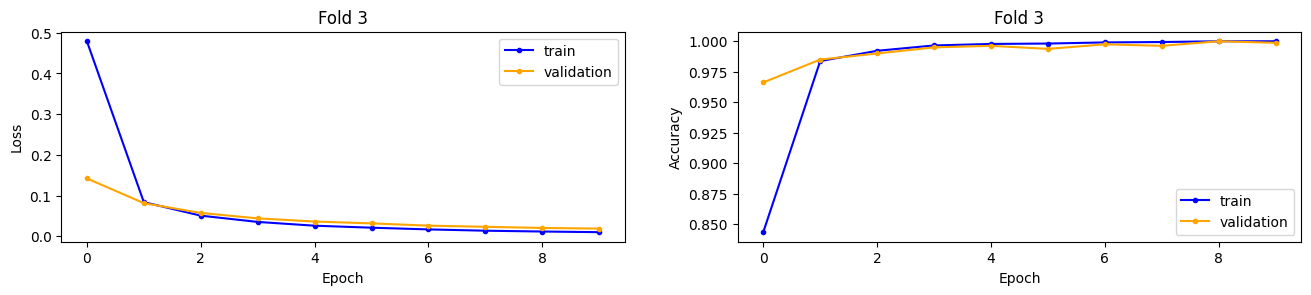

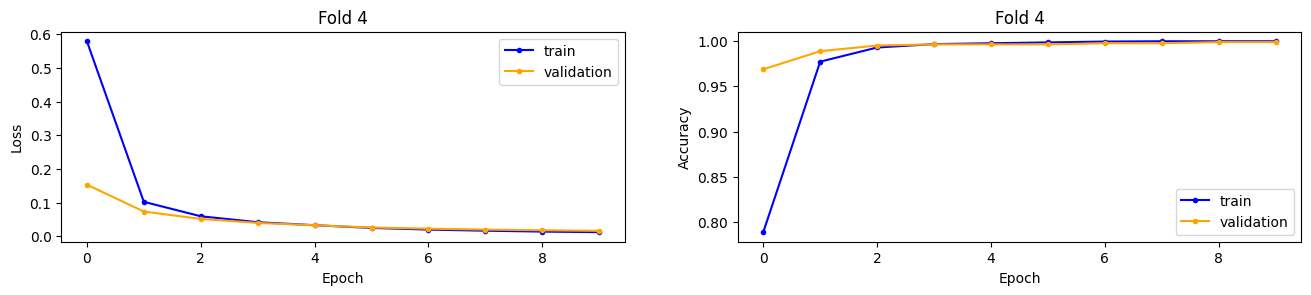

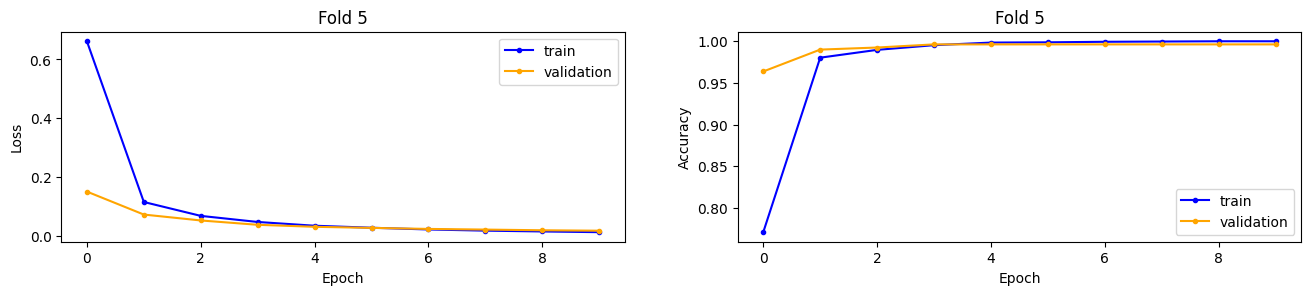

In [ ]:
import warnings
warnings.filterwarnings('ignore')

def summarize_diagnostics_single(histories):
    for i in range(len(histories)):
        plt.figure(figsize=(16,6))

        # Loss Plot
        plt.subplot(221) # 2 rows, 2 column, 1st index
        plt.title('Fold ' + str(i+1))
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.plot(histories[i].history['loss'], color='blue', marker='.', label='train')
        plt.plot(histories[i].history['val_loss'], color='orange', marker='.', label='test')
        plt.legend(['train', 'validation'], loc='upper right')

        # Accuracy Plot
        plt.subplot(222) # 2 rows, 2 column, 2nd index
        plt.title('Fold ' + str(i+1))
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.plot(histories[i].history['accuracy'], color='blue', marker='.', label='train')
        plt.plot(histories[i].history['val_accuracy'], color='orange', marker='.', label='test')
        plt.legend(['train', 'validation'], loc='lower right')
        plt.show()

summarize_diagnostics_single(histories)

## 4-3. Mean & Standard Deviation Scores

Accuracy: mean=99.775 std=0.094, n=5


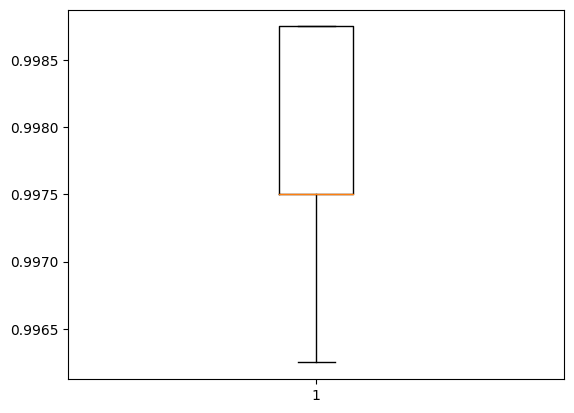

In [ ]:
from numpy import mean
from numpy import std

def summarize_performance(scores):
    print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
    plt.boxplot(scores)
    plt.show()

# Summarize estimated performance
summarize_performance(scores)

---
# 4. OPTION 2: Training without K-Fold Cross Validation
---

## 4-1. Training without K-Fold

In [ ]:
%%time

import pandas as pd

epochs = 10       # ⚠️Can be Customized⚠️
batch_size = 64   # ⚠️Can be Customized⚠️

model = define_model_mobilenetv2() # Define Model: Using MobileNetV2 which has been modified before
history = model.fit(X_train_norm, y_train_encode, epochs=epochs, batch_size=batch_size, verbose=1) # Fit model

Epoch 1/10
63/63 [==============================] - 51s 753ms/step - loss: 0.4818 - accuracy: 0.8360
Epoch 2/10
63/63 [==============================] - 46s 737ms/step - loss: 0.0804 - accuracy: 0.9868
Epoch 3/10
63/63 [==============================] - 46s 727ms/step - loss: 0.0467 - accuracy: 0.9927
Epoch 4/10
63/63 [==============================] - 47s 749ms/step - loss: 0.0313 - accuracy: 0.9965
Epoch 5/10
63/63 [==============================] - 48s 757ms/step - loss: 0.0236 - accuracy: 0.9985
Epoch 6/10
63/63 [==============================] - 46s 731ms/step - loss: 0.0182 - accuracy: 0.9990
Epoch 7/10
63/63 [==============================] - 48s 760ms/step - loss: 0.0147 - accuracy: 0.9995
Epoch 8/10
63/63 [==============================] - 46s 725ms/step - loss: 0.0119 - accuracy: 0.9998
Epoch 9/10
63/63 [==============================] - 47s 753ms/step - loss: 0.0100 - accuracy: 1.0000
Epoch 10/10
63/63 [==============================] - 47s 747ms/step - loss: 0.0085 - accura

## 4-2. Plot the Graphs of Training Results

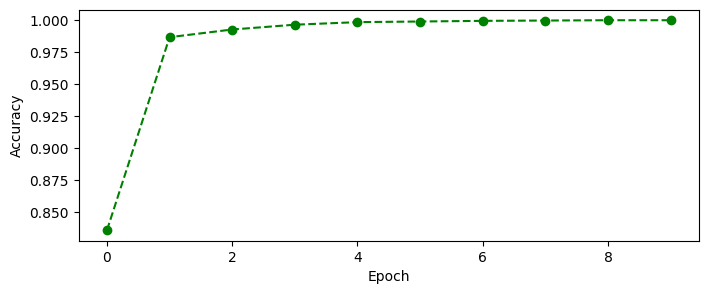

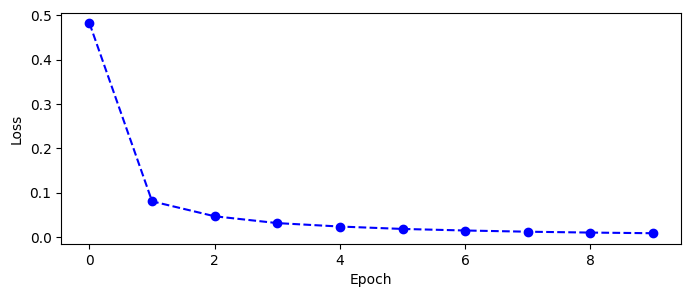

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 3))
ax.plot(history.history['accuracy'], 'og', linestyle='dashed')
#ax.plot(history.history['val_accuracy'])
ax.set_ylabel('Accuracy')
ax.set_xlabel('Epoch')
#ax.legend(['train', 'val'], loc='lower right')
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(8, 3))
ax.plot(history.history['loss'], 'ob', linestyle='dashed')
#ax.plot(history.history['val_loss'])
ax.set_ylabel('Loss')
ax.set_xlabel('Epoch')
#ax.legend(['train', 'val'], loc='upper right')
plt.show()

## 4-3. Save Model as H5 & CSV

In [ ]:
model.save("model_without_kfold.h5")       # Save Model as h5
model_csv = pd.DataFrame(history.history)  # Save Model Report to csv
csv_file = "model_without_kfold.csv"
with open(csv_file, mode="w") as f:
  model_csv.to_csv(f)

---
# 5. Testing Our CNN Model
---

## 5-1. Load Selected CNN Model

In [ ]:
# Clean the Previous Model (RAM Cleaner)
if "model" in globals():
  del model
  gc.collect()

# Load Model (Enter Path of Selected Model)
from keras.models import load_model
model = load_model('./model_fold_5.h5') # ⚠️Can be Customized⚠️
#model.summary()

## 5-2. Testing Model with Test Data

In [ ]:
from sklearn.preprocessing import LabelBinarizer

if "encoder" in globals():  # RAM Cleaner
    del encoder
    del y_train_encode_new
    del y_test_encode_new
    del pred
    del prediksi
    gc.collect()

encoder = LabelBinarizer()  # Encoding Labels (y) in different ways, for Confusion Matrix purposes
y_train_encode_new = encoder.fit_transform(y_train)
y_test_encode_new = encoder.fit_transform(y_test)

pred = model.predict(X_test_norm.astype('float32'), verbose=0)
prediksi = np.argmax(pred, axis=-1)  # Try -> predict.shape -> (800, 5) -> axis = -1 it will get that value 5 (number of Orchid Labels)

pred_probabilities = model.predict(X_test_norm, batch_size=64, verbose=0)
pred_label = np.argmax(pred_probabilities, axis=1)

true_label = np.argmax(y_test_encode_new, axis=-1)  # Actual Label (in Dataset)

print("Predict Label :", pred_label)
print("Actual Label  :", true_label, "\n")

loss, acc = model.evaluate(X_test_norm, y_test_encode_new, verbose=1)


Predict Label : [2 0 0 ... 4 1 1]
Actual Label  : [0 0 0 ... 4 4 4] 

79/79 [==============================] - 30s 364ms/step - loss: 0.7372 - accuracy: 0.7752


## 5-3. Evaluate Model with Confusion Matrix

Accuracy : 77.520%
Loss     : 0.737

Classification Report :

              precision    recall  f1-score   support

    cattleya       0.97      0.61      0.75       500
  dendrobium       0.64      0.95      0.77       500
    oncidium       0.63      0.91      0.74       500
phalaenopsis       0.96      0.98      0.97       500
       vanda       1.00      0.43      0.60       500

    accuracy                           0.78      2500
   macro avg       0.84      0.78      0.77      2500
weighted avg       0.84      0.78      0.77      2500



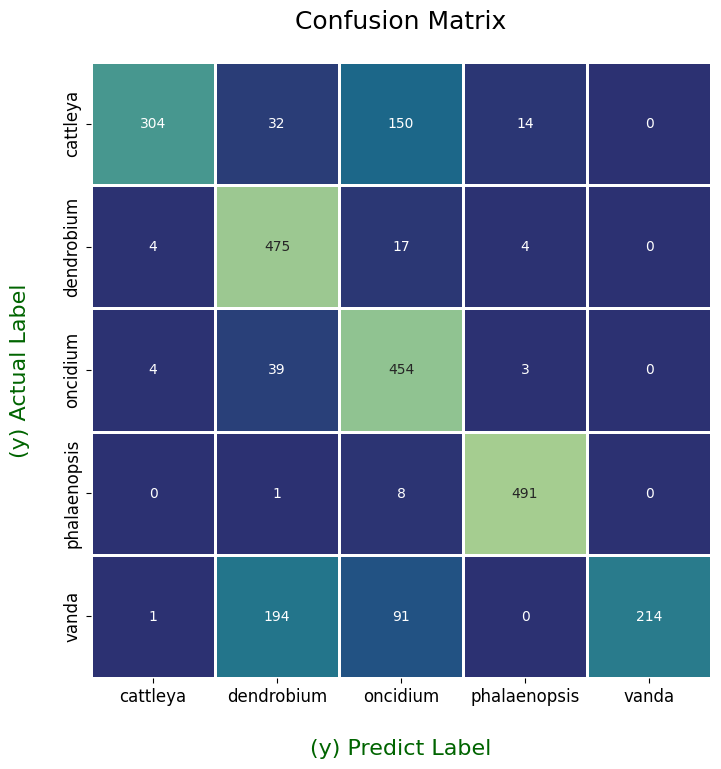

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

target_names = ['cattleya', 'dendrobium', 'oncidium', 'phalaenopsis', 'vanda']
cmatrix = confusion_matrix(true_label, pred_label)
creport = classification_report(true_label, pred_label, target_names=target_names)

print("Accuracy : {:.3f}%".format(acc * 100))
print("Loss     : {:.3f}".format(loss))

print("\nClassification Report :\n")
print(creport)

fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(cmatrix, cmap="crest_r", annot=True, fmt='.4g', linewidths=2, linecolor='white', cbar=False, ax=ax)
# cmap options: rocket, mako, flare, crest, magma, viridis, rocket_r, cubehelix, seagreen, Blues, ...

ax.set_title('Confusion Matrix', fontsize=18, pad=24)
ax.set_xticklabels(labels=target_names, fontsize=12)
ax.set_yticklabels(labels=target_names, fontsize=12)

plt.xlabel("(y) Predict Label", fontsize=16, color="darkgreen", labelpad=24)
plt.ylabel("(y) Actual Label", fontsize=16, color="darkgreen", labelpad=24)
plt.show()


## 5-4. Testing Model with Test Data from Internet

In [ ]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model

# Load and Prepare the Image
def load_image(filename):
    img = load_img(filename, target_size=(img_size_224p, img_size_224p))
    plt.imshow(img)
    plt.axis("off");
    img = img_to_array(img)
    img = img.reshape(-1, img_size_224p, img_size_224p, 3)
    img = img.astype('float32')
    img = img / 255.0
    return img

# Load an Image and Predict the Class/Label
def run_example(new_data_path):
    # Load the Image
    img = load_image(new_data_path)
    # Load Model
    model = load_model('./model_fold_5.h5') # ⚠️Can be Customized⚠️
    # Predict the Class/Label
    result = model.predict_classes(img) # OPTION 1
    #result = model.predict(img)        # OPTION 2
    if result[0] == 0:
        print("\nPredict Label: Cattleya")
    elif result[0] == 1:
        print("\nPredict Label: Dendrobium")
    elif result[0] == 2:
        print("\nPredict Label: Oncidium")
    elif result[0] == 3:
        print("\nPredict Label: Phalaenopsis")
    elif result[0] == 4:
        print("\nPredict Label: Vanda")

AttributeError: 'Sequential' object has no attribute 'predict_classes'

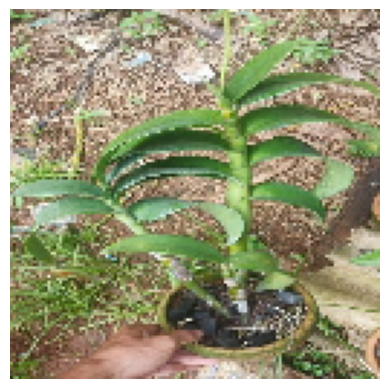

In [ ]:
# Get image data directly from the internet
#!wget -O 'new_test_data.jpg' 'https://lumencms.blob.core.windows.net/media-generated/538/_L2A0849-ANSU-VANDA-Vanda-Terra-2-600-600.jpg'

# Get image data from the dataset
new_data_path = '/content/drive/My Drive/DSO_569/orchid_genus/inet/dendrobium/D1.jpg' # ⚠️Can be Customized⚠️
run_example(new_data_path)

---
# 6. Conclusion
---

The resulting CNN model is overfitting, this means that training accuracy and testing accuracy have a high difference. Some solutions that can be used to reduce overfitting are as follows:<br>
1. Add More Dataset
2. Use Data Augmentation Technique
3. Adjust CNN Architecture
4. Adjust Hyperparameters
5. Use Dropout Regularization Technique

UPDATE: It has been tested with an input shape image of 224x224x3 on the Google Colaboratory platform, resulting in a test accuracy score of 80-90%. The link can be accessed at: https://github.com/alamehan/skripsi-cnn-anggrek